<a href="https://colab.research.google.com/github/deyaliao/surestart2021/blob/main/houseprices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import all packages

import os # accessing directory structure
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt # plotting
%matplotlib inline


In [3]:
# import data and download
from google.colab import files
uploaded = files.upload()


Saving housepricedata.csv to housepricedata.csv


In [4]:
df = pd.read_csv('housepricedata.csv')
df


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [5]:
# convert to arrays
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [6]:
# split all features
X = dataset[:,0:10]
Y = dataset[:,10]


In [7]:
# data preprocessing
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)


create model itself

In [9]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])


In [10]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
# train
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 9ms/step - loss: 0.6697 - accuracy: 0.5100 - val_loss: 0.6732 - val_accuracy: 0.4977
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6664 - accuracy: 0.5060 - val_loss: 0.6643 - val_accuracy: 0.5068
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6528 - accuracy: 0.5400 - val_loss: 0.6564 - val_accuracy: 0.5388
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6456 - accuracy: 0.5634 - val_loss: 0.6493 - val_accuracy: 0.6438
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6385 - accuracy: 0.6562 - val_loss: 0.6426 - val_accuracy: 0.6667
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6331 - accuracy: 0.6649 - val_loss: 0.6360 - val_accuracy: 0.6986
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6249 - accuracy: 0.7080 - val_loss: 0.6295 - val_accuracy: 0.7397
Epoch 8/100
3

In [11]:
# original accuracy
model.evaluate(X_test, Y_test)[1]


7/7 [==============================] - 0s 2ms/step - loss: 0.2588 - accuracy: 0.8995


0.8995434045791626

important: visualizing loss and accuracy --> how can we improve our model?

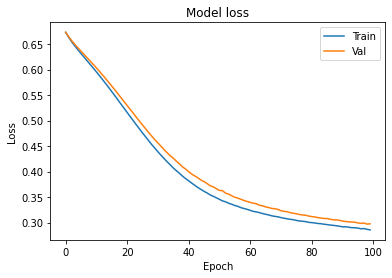

In [12]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


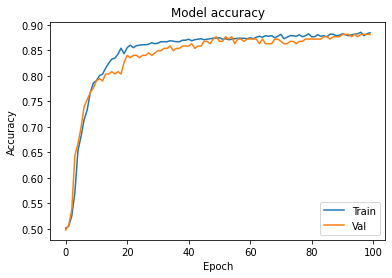

In [13]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


addressing overfitting: add L2 regularization (add cost with regards to squared value of parameters)


In [15]:
from keras.layers import Dropout
from keras import regularizers

model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])


In [16]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))


Epoch 1/100
32/32 [==============================] - 3s 57ms/step - loss: 21.1407 - accuracy: 0.5685 - val_loss: 3.9344 - val_accuracy: 0.7397
Epoch 2/100
32/32 [==============================] - 2s 52ms/step - loss: 2.5170 - accuracy: 0.7761 - val_loss: 0.6705 - val_accuracy: 0.8584
Epoch 3/100
32/32 [==============================] - 2s 51ms/step - loss: 0.5833 - accuracy: 0.8773 - val_loss: 0.5245 - val_accuracy: 0.8584
Epoch 4/100
32/32 [==============================] - 2s 52ms/step - loss: 0.5163 - accuracy: 0.8737 - val_loss: 0.4848 - val_accuracy: 0.8813
Epoch 5/100
32/32 [==============================] - 2s 54ms/step - loss: 0.5153 - accuracy: 0.8505 - val_loss: 0.5169 - val_accuracy: 0.8447
Epoch 6/100
32/32 [==============================] - 2s 50ms/step - loss: 0.4987 - accuracy: 0.8602 - val_loss: 0.4966 - val_accuracy: 0.8584
Epoch 7/100
32/32 [==============================] - 2s 50ms/step - loss: 0.4730 - accuracy: 0.8694 - val_loss: 0.4666 - val_accuracy: 0.8813
Epoch

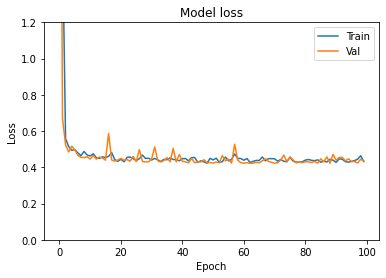

In [17]:
# visualize loss
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()


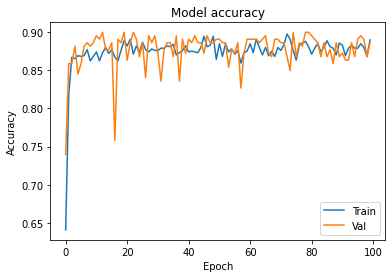

In [18]:
# visualize accuracy
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


In [19]:
# accuracy
model_3.evaluate(X_test, Y_test)[1]


7/7 [==============================] - 0s 12ms/step - loss: 0.3966 - accuracy: 0.9087


0.9086757898330688